## Importing Libraries

In [800]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

### Importing the data into the Dataframe df

In [801]:
df = pd.read_csv("weatherAUS.csv")

In [802]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [803]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Traget Variables

In [804]:
RainTomorrow_freq = pd.crosstab(index=df["RainTomorrow"], columns="count")
RainToday_freq = pd.crosstab(index = df["RainToday"], columns="count")
print(RainTomorrow_freq)
print(RainToday_freq)

col_0          count
RainTomorrow        
No            110316
Yes            31877
col_0       count
RainToday        
No         110319
Yes         31880


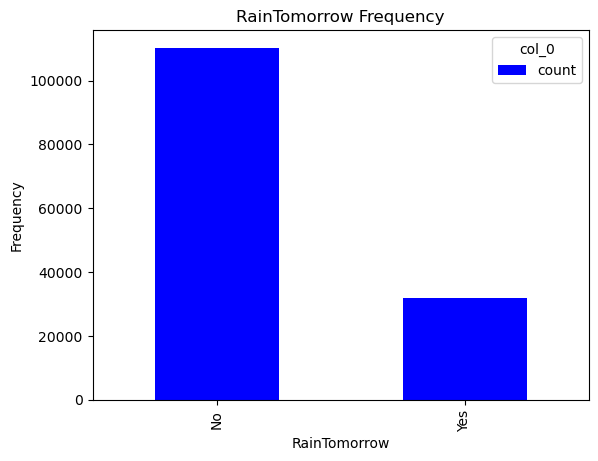

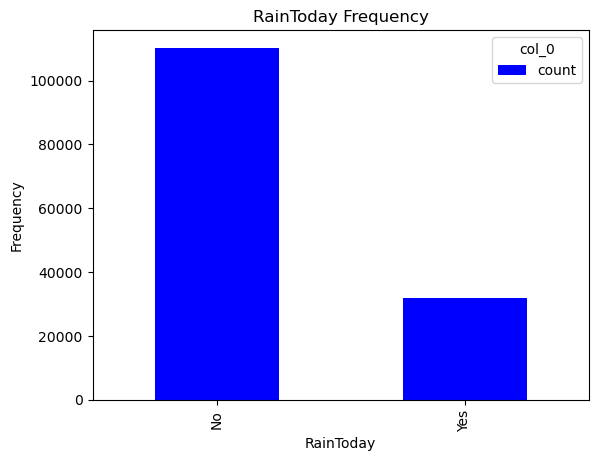

In [805]:
RainTomorrow_freq.plot(kind="bar", color="blue")
plt.title("RainTomorrow Frequency")
plt.xlabel("RainTomorrow")
plt.ylabel("Frequency")
plt.show()

RainToday_freq.plot(kind="bar", color="blue")
plt.title("RainToday Frequency")
plt.xlabel("RainToday")
plt.ylabel("Frequency")
plt.show()



In [806]:
# Deleteing the rows in which the value of the column RainToday and RainTomorrow is null

df = df.dropna(subset=['RainToday', 'RainTomorrow'])

### converting to float from string

In [807]:
df.RainToday = df.RainToday.map({"Yes": 1.0, "No": 0.0})

In [808]:
df.RainTomorrow = df.RainTomorrow.map({"Yes": 1.0, "No": 0.0})

### Exploring MinTemp and MaxTemp

In [809]:
print("MinTemp")
print(df.MinTemp.describe())
print("Missing Values", df.MinTemp.isnull().sum())
print("\n MaxTemp")
print(df.MaxTemp.describe())
print("Missing Values", df.MaxTemp.isnull().sum())

MinTemp
count    140319.000000
mean         12.184824
std           6.403879
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.800000
max          33.900000
Name: MinTemp, dtype: float64
Missing Values 468

 MaxTemp
count    140480.00000
mean         23.23512
std           7.11450
min          -4.80000
25%          17.90000
50%          22.60000
75%          28.30000
max          48.10000
Name: MaxTemp, dtype: float64
Missing Values 307


<Axes: xlabel='MinTemp', ylabel='Count'>

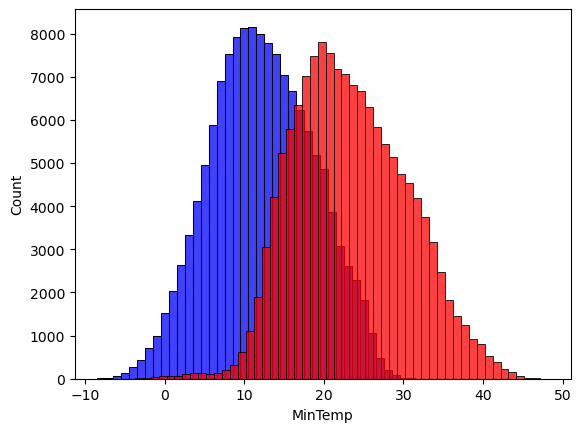

In [810]:
sns.histplot(data = df.MinTemp, binwidth = 1, color = "blue",legend=True)
sns.histplot(data = df.MaxTemp, binwidth = 1, color = "red", legend=True)

#### Fixing missing values of min and max temperature by imputing mean values

In [811]:
impute_knn = KNNImputer(n_neighbors = 2)


In [812]:
df.MinTemp = impute_knn.fit_transform(df.MinTemp.values.reshape(-1, 1))
df.MaxTemp = impute_knn.fit_transform(df.MaxTemp.values.reshape(-1, 1))

In [813]:
# iter_impute = IterativeImputer()

In [814]:
# df.MinTemp = iter_impute.fit_transform(df.MinTemp.values.reshape(-1,1))
# df.MaxTemp = iter_impute.fit_transform(df.MaxTemp.values.reshape(-1,1))

In [815]:
# column = df.MinTemp.values.reshape(-1,1)
# df.MinTemp = SimpleImputer(missing_values = np.nan, strategy = "mean").fit_transform(column)

In [816]:
# column = df.MaxTemp.values.reshape(-1,1)
# df.MaxTemp = SimpleImputer(missing_values = np.nan, strategy = "mean").fit_transform(column)

<Axes: xlabel='MinTemp', ylabel='Count'>

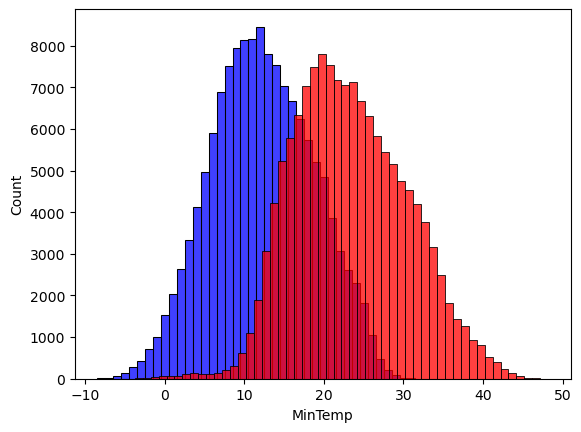

In [817]:
sns.histplot(data = df.MinTemp, binwidth = 1, color = "blue",legend=True)
sns.histplot(data = df.MaxTemp, binwidth = 1, color = "red", legend=True)


### Exploring rainfall

In [818]:
df[["Rainfall","RainToday"]].head()

,Rainfall,RainToday
0,0.6,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0


In [819]:
df.Rainfall.describe()

count    140787.000000
mean          2.349974
std           8.465173
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

In [820]:
# minimum rainfall on days where RainToday = Yes
df[df.RainToday == "Yes"].Rainfall.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Rainfall, dtype: float64

In [821]:
# Maximmum rainfall on days where RainToday = No

df[df.RainToday == "No"].Rainfall.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Rainfall, dtype: float64

In [822]:
df.Rainfall.isnull().sum()

0

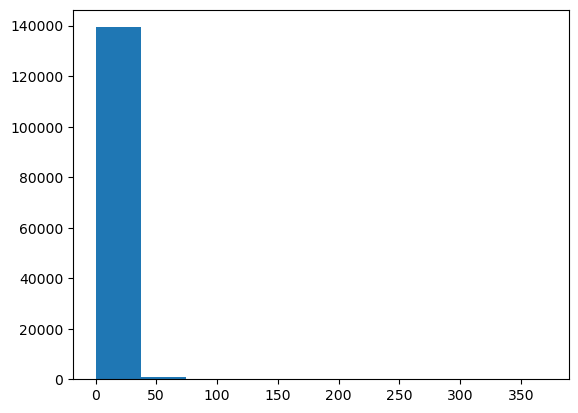

In [823]:
plt.hist(df.Rainfall)
plt.show()

#### Transforming Rainfall data into square rooot

In [824]:
df.Rainfall = df.Rainfall.apply(lambda x: np.sqrt(x))

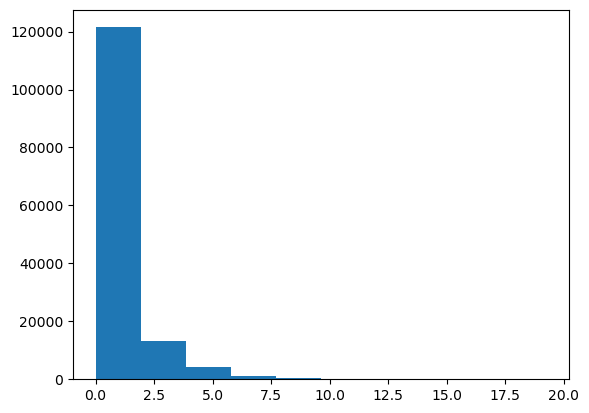

In [825]:
plt.hist(df.Rainfall)
plt.show()

### Exploring Temp9am and Temp3pm

In [826]:
print("Temp9am")
print(df.Temp9am.describe())
print("missing Values",df.Temp9am.isnull().sum())
print("\nTemp3pm")
print(df.Temp3pm.describe())
print("missing Values",df.Temp3pm.isnull().sum())

Temp9am
count    140131.000000
mean         16.987066
std           6.496012
min          -7.200000
25%          12.300000
50%          16.700000
75%          21.600000
max          40.200000
Name: Temp9am, dtype: float64
missing Values 656

Temp3pm
count    138163.000000
mean         21.693183
std           6.937784
min          -5.400000
25%          16.600000
50%          21.100000
75%          26.400000
max          46.700000
Name: Temp3pm, dtype: float64
missing Values 2624


<Axes: xlabel='Temp9am', ylabel='Count'>

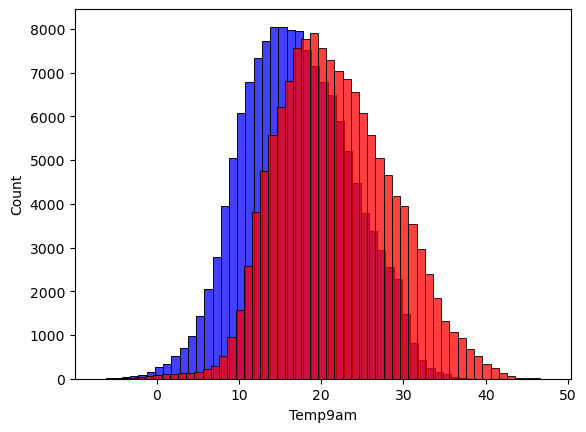

In [827]:
sns.histplot(data = df.Temp9am, binwidth = 1, color = "blue")
sns.histplot(data = df.Temp3pm, binwidth = 1, color = "red")

In [828]:
df[["Temp9am","MinTemp","Temp3pm","MaxTemp"]].head(20)

,Temp9am,MinTemp,Temp3pm,MaxTemp
0,16.9,13.4,21.8,22.9
1,17.2,7.4,24.3,25.1
2,21.0,12.9,23.2,25.7
3,18.1,9.2,26.5,28.0
4,17.8,17.5,29.7,32.3
5,20.6,14.6,28.9,29.7
6,18.1,14.3,24.6,25.0
7,16.3,7.7,25.5,26.7
8,18.3,9.7,30.2,31.9
9,20.1,13.1,28.2,30.1


In [829]:
diff_max_3 = df['MaxTemp']-df["Temp3pm"]
diff_max_3.describe()

count    138163.000000
mean          1.508788
std           1.255738
min         -17.864880
25%           0.700000
50%           1.200000
75%           1.900000
max          23.035120
dtype: float64

In [830]:
df.Temp3pm = df.Temp3pm.fillna(df.MaxTemp - diff_max_3.mean(),)

In [831]:
diff_min_9 = df.Temp9am - df.MinTemp
diff_min_9.describe()

count    140131.000000
mean          4.784604
std           2.863760
min          -5.484824
25%           2.600000
50%           4.400000
75%           6.500000
max          22.000000
dtype: float64

In [832]:
df.Temp9am = df.Temp9am.fillna(df.MinTemp + diff_min_9.mean())

<Axes: xlabel='Temp9am', ylabel='Count'>

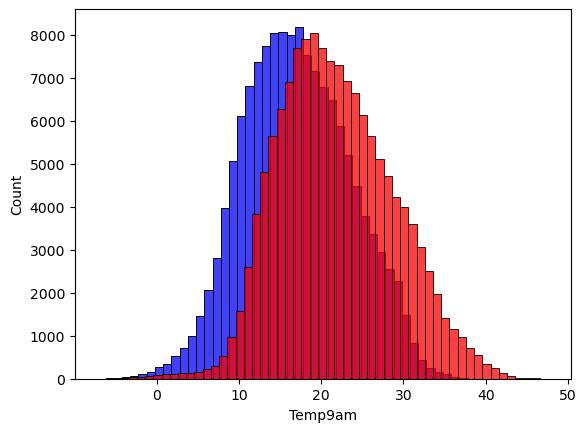

In [833]:
sns.histplot(data = df.Temp9am, binwidth = 1, color = "blue")
sns.histplot(data = df.Temp3pm, binwidth = 1, color = "red")

In [834]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

### Exploring Humidity9am and Humidity3pm

In [835]:
print("9am")
print(df.Humidity9am.describe())
print("Missing values = ", df.Humidity9am.isnull().sum())
print("\n3pm")
print(df.Humidity3pm.describe())
print("Missing values = ", df.Humidity3pm.isnull().sum())

9am
count    139270.000000
mean         68.826833
std          19.063650
min           0.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: Humidity9am, dtype: float64
Missing values =  1517

3pm
count    137286.000000
mean         51.449288
std          20.807310
min           0.000000
25%          37.000000
50%          52.000000
75%          66.000000
max         100.000000
Name: Humidity3pm, dtype: float64
Missing values =  3501


In [836]:
print("9am")
print(df.Humidity9am.describe())
print("Missing values = ", df.Humidity9am.isnull().sum())
print("\n3pm")
print(df.Humidity3pm.describe())
print("Missing values = ", df.Humidity3pm.isnull().sum())

9am
count    139270.000000
mean         68.826833
std          19.063650
min           0.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: Humidity9am, dtype: float64
Missing values =  1517

3pm
count    137286.000000
mean         51.449288
std          20.807310
min           0.000000
25%          37.000000
50%          52.000000
75%          66.000000
max         100.000000
Name: Humidity3pm, dtype: float64
Missing values =  3501


<Axes: >

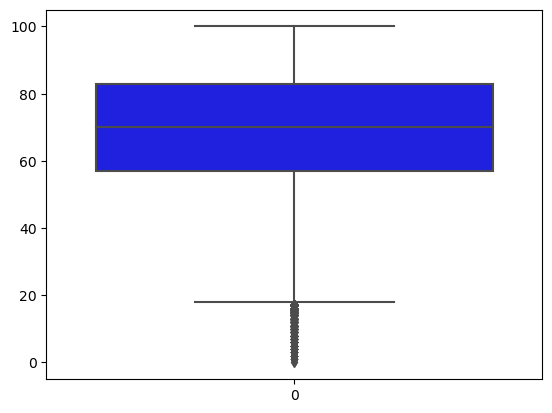

In [837]:
sns.boxplot(data= df.Humidity9am,color="blue")

<Axes: >

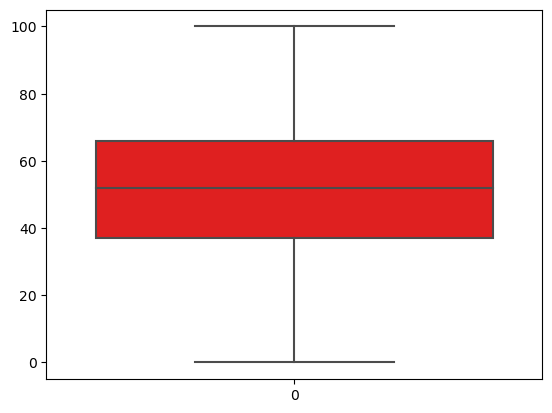

In [838]:
sns.boxplot(data= df.Humidity3pm,color="red")

<Axes: xlabel='Humidity9am', ylabel='Count'>

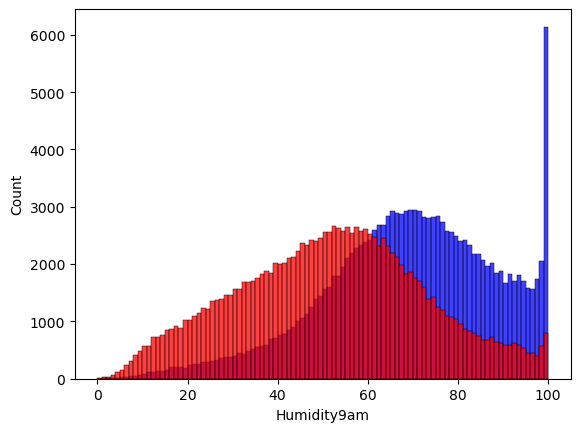

In [839]:
sns.histplot(data= df.Humidity9am, color="blue", binwidth = 1)
sns.histplot(data= df.Humidity3pm, color="red", binwidth = 1)

In [840]:
avg_diff_humidity = abs(df.Humidity9am - df.Humidity3pm)/2

In [841]:
avg_diff_humidity.mean()

9.806062090547497

In [842]:
df.Humidity9am.isnull().sum(), df.Humidity3pm.isnull().sum()

(1517, 3501)

In [843]:
df.Humidity9am.fillna(df.Humidity3pm + avg_diff_humidity.mean(), inplace = True)
df.Humidity3pm.fillna(df.Humidity9am - avg_diff_humidity.mean(), inplace = True)

In [844]:
df.Humidity9am.isnull().sum(), df.Humidity3pm.isnull().sum()

(999, 999)

In [845]:
df.Humidity9am = df.Humidity9am.interpolate()
df.Humidity3pm = df.Humidity3pm.interpolate()

In [846]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am          0
Humidity3pm          0
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

### Cloud Cover

In [847]:
print(df.Cloud9am.describe())
print(df.Cloud9am.isnull().sum())

count    88162.000000
mean         4.431161
std          2.886594
min          0.000000
25%          1.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud9am, dtype: float64
52625


In [848]:
print(df.Cloud3pm.describe())
print(df.Cloud3pm.isnull().sum())

count    84693.000000
mean         4.499250
std          2.719752
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud3pm, dtype: float64
56094


In [849]:
df.Cloud3pm = df.Cloud3pm.fillna(df.Cloud9am)
df.Cloud9am = df.Cloud9am.fillna(df.Cloud3pm)

In [850]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am          0
Humidity3pm          0
Pressure9am      13743
Pressure3pm      13769
Cloud9am         48761
Cloud3pm         48761
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [851]:
### Drpoing Evaporatin, sunshine and cloud cover because of too much missing values

In [852]:
df = df.drop(columns = ["Evaporation","Sunshine","Cloud9am","Cloud3pm"])

In [853]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am          0
Humidity3pm          0
Pressure9am      13743
Pressure3pm      13769
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

### Wind Gust Speed

In [854]:
df.WindGustSpeed.head()

0    44.0
1    44.0
2    46.0
3    24.0
4    41.0
Name: WindGustSpeed, dtype: float64

In [855]:
df.WindGustSpeed.isnull().sum()

9105

<Axes: >

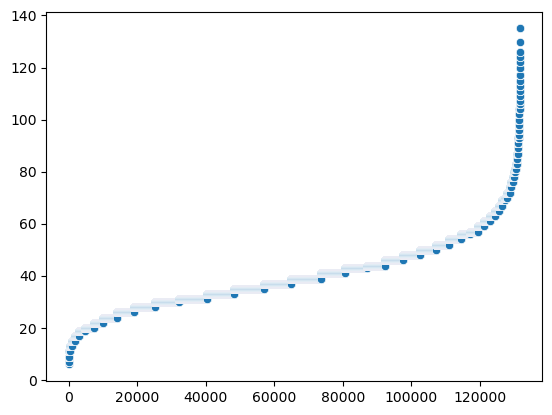

In [856]:
sns.scatterplot(data = np.sort(df.WindGustSpeed))

<Axes: xlabel='WindGustSpeed', ylabel='Count'>

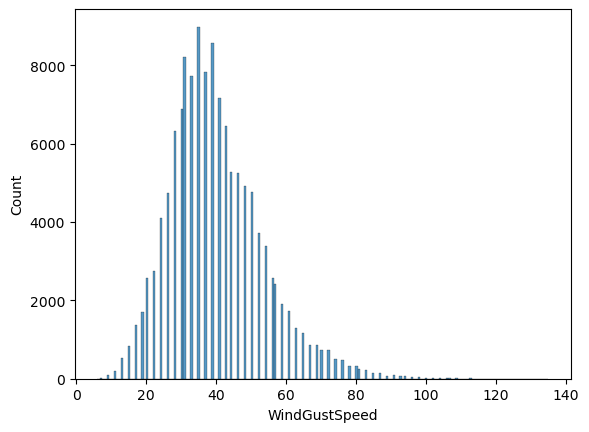

In [857]:
sns.histplot(data = df.WindGustSpeed)

<Axes: ylabel='WindGustSpeed'>

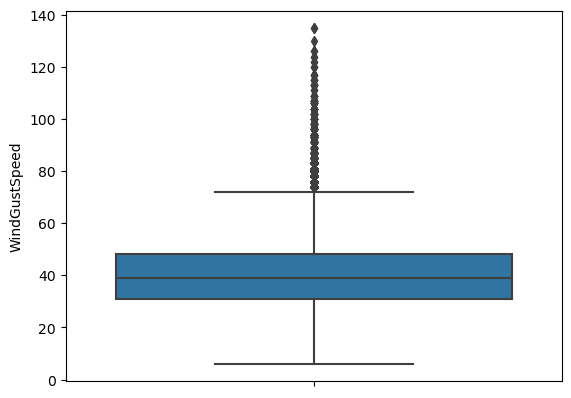

In [858]:
sns.boxplot(data = df.WindGustSpeed, y = df.index)

In [859]:
df[df.WindGustSpeed > 120].Location.unique()

array(['NorahHead', 'Wollongong', 'MelbourneAirport', 'Woomera', 'Hobart',
       'Darwin'], dtype=object)

In [860]:
df.WindGustSpeed.isnull().sum(), df.WindSpeed9am.isnull().sum(),  df.WindSpeed3pm.isnull().sum()

(9105, 1055, 2531)

In [861]:
df.WindGustSpeed.fillna(df.WindSpeed9am, inplace = True)
df.WindGustSpeed.fillna(df.WindSpeed3pm, inplace = True)

In [862]:
df.WindGustSpeed.isnull().sum(), df.WindSpeed9am.isnull().sum(),  df.WindSpeed3pm.isnull().sum()

(765, 1055, 2531)

In [863]:
df.WindSpeed9am.fillna(df.WindGustSpeed, inplace = True)
df.WindSpeed3pm.fillna(df.WindGustSpeed, inplace = True)

### Imputing all numerical missing values using sklearn's interpolate

In [864]:
numeric_variables = ["WindGustSpeed","WindSpeed9am","WindSpeed3pm", "Pressure9am" , "Pressure3pm"]

In [865]:
df[numeric_variables] = df[numeric_variables].interpolate()

In [866]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    131624 non-null  object 
 6   WindGustSpeed  140787 non-null  float64
 7   WindDir9am     131127 non-null  object 
 8   WindDir3pm     137117 non-null  object 
 9   WindSpeed9am   140787 non-null  float64
 10  WindSpeed3pm   140787 non-null  float64
 11  Humidity9am    140787 non-null  float64
 12  Humidity3pm    140787 non-null  float64
 13  Pressure9am    140787 non-null  float64
 14  Pressure3pm    140787 non-null  float64
 15  Temp9am        140787 non-null  float64
 16  Temp3pm        140787 non-null  float64
 17  RainToday      140787 non-nul

## Wind Gust Direction

In [867]:
df.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [868]:
df.WindGustDir.isnull().sum()

9163

<Axes: xlabel='WindGustDir'>

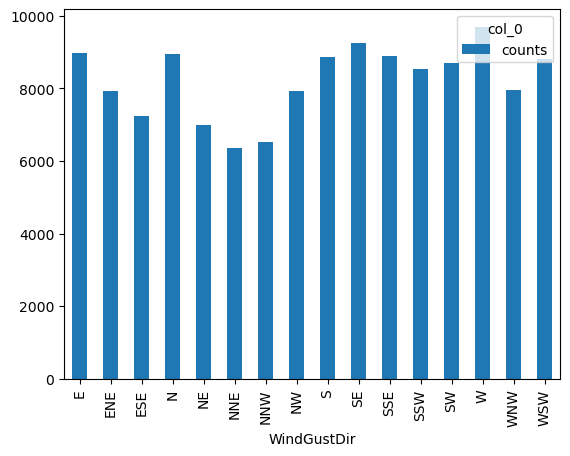

In [869]:
RainTomorrow_freq = pd.crosstab(index=df["RainTomorrow"], columns="count")
WindGustDir_freq = pd.crosstab(index = df["WindGustDir"] , columns = "counts")
WindGustDir_freq.plot(kind = "bar")

In [870]:
df[df.WindGustDir.isnull()][["WindGustDir", "WindDir9am", "WindDir3pm"]]

,WindGustDir,WindDir9am,WindDir3pm
64,NaN,N,NaN
65,NaN,NaN,NaN
458,NaN,SE,S
1058,NaN,SE,NaN
1059,NaN,SSE,NaN
...,...,...,...
145087,NaN,NaN,NaN
145088,NaN,NaN,NaN
145089,NaN,NaN,NaN
145090,NaN,NaN,NaN


In [871]:
df.WindGustDir.isnull().sum()

9163

In [872]:
df.WindGustDir.fillna(df.WindDir9am , inplace = True)
df.WindGustDir.fillna(df.WindDir3pm, inplace = True)

In [873]:
df.WindDir3pm.fillna(df.WindGustDir, inplace  = True)
df.WindDir9am.fillna(df.WindGustDir, inplace  = True)

In [874]:
df.WindGustDir.isnull().sum()

1433

In [875]:
df.dropna(subset = ["WindGustDir"], inplace = True)

In [876]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139354 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           139354 non-null  object 
 1   Location       139354 non-null  object 
 2   MinTemp        139354 non-null  float64
 3   MaxTemp        139354 non-null  float64
 4   Rainfall       139354 non-null  float64
 5   WindGustDir    139354 non-null  object 
 6   WindGustSpeed  139354 non-null  float64
 7   WindDir9am     139354 non-null  object 
 8   WindDir3pm     139354 non-null  object 
 9   WindSpeed9am   139354 non-null  float64
 10  WindSpeed3pm   139354 non-null  float64
 11  Humidity9am    139354 non-null  float64
 12  Humidity3pm    139354 non-null  float64
 13  Pressure9am    139354 non-null  float64
 14  Pressure3pm    139354 non-null  float64
 15  Temp9am        139354 non-null  float64
 16  Temp3pm        139354 non-null  float64
 17  RainToday      139354 non-nul

In [877]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [878]:
df.reset_index(drop= True, inplace = True)

# Binning into Dummy Variables

### Date

In [879]:
df[["Year", "Month", "Day"]] = df.Date.str.split("-",expand=True)

In [880]:
df[["Year","Month","Day"]] = df[["Year","Month","Day"]].astype(np.float64)

In [881]:
df.drop(columns = ["Day","Date"], inplace = True)

In [882]:
df.Month = df.Month.map({1:"January",
2:"February",
3:"March",
4:"April",
5:"May",
6:"June",
7:"July",
8:"August",
9:"September",
10:"October",
11:"November",
12:"December"})

### Location and WindGustDir

In [883]:
df = df.drop(columns = ["WindDir9am","WindDir3pm"])

In [884]:
df = pd.get_dummies(df)

In [885]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139354 entries, 0 to 139353
Data columns (total 92 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   MinTemp                    139354 non-null  float64
 1   MaxTemp                    139354 non-null  float64
 2   Rainfall                   139354 non-null  float64
 3   WindGustSpeed              139354 non-null  float64
 4   WindSpeed9am               139354 non-null  float64
 5   WindSpeed3pm               139354 non-null  float64
 6   Humidity9am                139354 non-null  float64
 7   Humidity3pm                139354 non-null  float64
 8   Pressure9am                139354 non-null  float64
 9   Pressure3pm                139354 non-null  float64
 10  Temp9am                    139354 non-null  float64
 11  Temp3pm                    139354 non-null  float64
 12  RainToday                  139354 non-null  float64
 13  RainTomorrow               13

In [886]:
df.to_csv("explored_weather_data.csv")

# Train Test Split

In [887]:
X = df.iloc[:,16:18]
Y = df.iloc[:, 0:83]
Y.drop(columns = ["RainToday", "RainTomorrow"], inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

# Feature Scalling

In [888]:
X_train = preprocessing.StandardScaler().fit_transform(X_train)
X_test = preprocessing.StandardScaler().fit_transform(X_test)

In [889]:
X_train

array([[-0.14611296, -0.14994601],
       [ 6.84401988, -0.14994601],
       [-0.14611296, -0.14994601],
       ...,
       [-0.14611296, -0.14994601],
       [-0.14611296, -0.14994601],
       [-0.14611296, -0.14994601]])